## Machine Learning Lab Assignment - 6

**Author** - Tirth Modi (202201513)

#### Question 1:
Generate the set of points A and B in R2, each consisting of 2000 data points from a bi‐variate normal distribution. The set A and B has been drawn from the N (μ1, Σ1 ) and N( μ2, Σ2 ). Let us fix the μ1 = [‐1,‐1] and μ2 = [2,1]. Separate the 500 data points from each class as a testing set. Plot the optimal Bayesian decision boundary and compute the testing accuracy on test set for three following cases

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu1 = [-1, -1]
mu2 = [2, 1]
train_size, test_size = 1500, 500

In [3]:
sigma_cases = {
    'A': (np.eye(2), np.eye(2)),
    'B': (np.array([[1, 0.6], [0.6, 1]]), np.array([[1, 0.6], [0.6, 1]])),
    'C': (np.array([[1, 0.8], [0.8, 1]]), np.array([[1, 0.1], [0.1, 1]]))
}

In [4]:
def bayesian_decision_boundary(mu1, mu2, sigma1, sigma2):
    inv_sigma1 = np.linalg.inv(sigma1)
    inv_sigma2 = np.linalg.inv(sigma2)
    
    A = inv_sigma1 - inv_sigma2
    B = 2 * (np.dot(mu2, inv_sigma2) - np.dot(mu1, inv_sigma1))
    C = (np.dot(np.dot(mu1, inv_sigma1), mu1) - np.dot(np.dot(mu2, inv_sigma2), mu2))
    
    return A, B, C

In [5]:
def generate_data(mu, sigma, num_points):
    return np.random.multivariate_normal(mu, sigma, num_points)

def classify_points(X, a, b):
    return np.sign(np.dot(X, a) + b)

def accuracy(predictions, labels):
    return np.mean(predictions == labels)

In [6]:
def plot_boundary(a, b, X1_train, X2_train, case):
    plt.figure()
    x_min, x_max = -4, 6
    y_min, y_max = -4, 6
    
    plt.scatter(X1_train[:, 0], X1_train[:, 1], color='blue', label="Class A", alpha=0.6)
    plt.scatter(X2_train[:, 0], X2_train[:, 1], color='red', label="Class B", alpha=0.6)
    
    if np.abs(a[1]) < 1e-5:
        if np.abs(a[0]) > 1e-5:
            x_vals = np.full(100, -b / a[0])
            y_vals = np.linspace(y_min, y_max, 100)
        else:
            print(f"Both a[0] and a[1] are nearly zero for case {case}. Boundary can't be computed.")
            return
    else:
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = -(a[0] * x_vals + b) / a[1]

    plt.plot(x_vals, y_vals, color='green', label="Decision Boundary", linewidth=2)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.title(f"Decision Boundary for Case {case}")
    plt.show()

def plot_quadratic_boundary(A, B, C, X1_train, X2_train, case):
    plt.figure()
    x_min, x_max = -4, 6
    y_min, y_max = -4, 6
    
    plt.scatter(X1_train[:, 0], X1_train[:, 1], color='blue', label="Class A", alpha=0.6)
    plt.scatter(X2_train[:, 0], X2_train[:, 1], color='red', label="Class B", alpha=0.6)
    x_vals = np.linspace(x_min, x_max, 300)
    y_vals = np.linspace(y_min, y_max, 300)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = np.dot(point.T, np.dot(A, point)) + np.dot(B, point) + C
    
    plt.contour(X, Y, Z, levels=[0], colors='green')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.title(f"Quadratic Decision Boundary for Case {case}")
    plt.show()

Both a[0] and a[1] are nearly zero for case A. Boundary can't be computed.
Both a[0] and a[1] are nearly zero for case B. Boundary can't be computed.


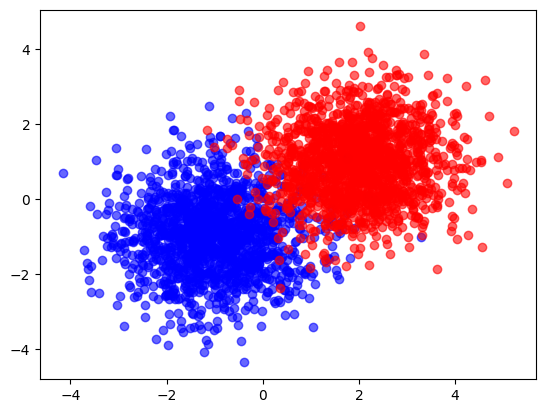

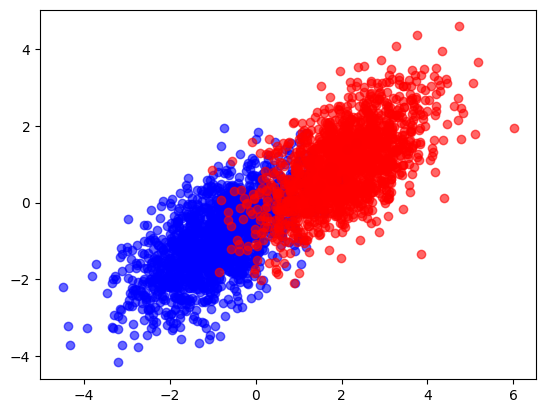

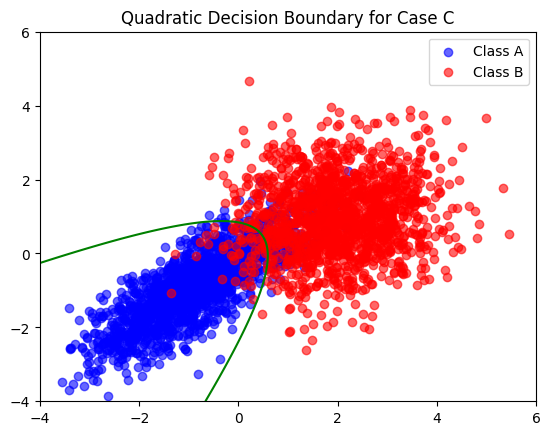

In [7]:
for case, (sigma1, sigma2) in sigma_cases.items():
    X1 = generate_data(mu1, sigma1, train_size + test_size)
    X2 = generate_data(mu2, sigma2, train_size + test_size)
    
    X1_train, X1_test = X1[:train_size], X1[train_size:]
    X2_train, X2_test = X2[:train_size], X2[train_size:]
    
    X_train = np.vstack((X1_train, X2_train))
    X_test = np.vstack((X1_test, X2_test))
    y_train = np.hstack((np.ones(train_size), -1*np.ones(train_size)))
    y_test = np.hstack((np.ones(test_size), -1*np.ones(test_size)))

    if case == 'C':
        A, B, C = bayesian_decision_boundary(mu1, mu2, sigma1, sigma2)
        plot_quadratic_boundary(A, B, C, X1_train, X2_train, case)
    else:
        inv_sigma1, inv_sigma2 = np.linalg.inv(sigma1), np.linalg.inv(sigma2)
        a = np.dot(inv_sigma1 - inv_sigma2, np.array(mu2) - np.array(mu1))
        b = 0.5 * (np.dot(np.dot(mu1, inv_sigma1), mu1) - np.dot(np.dot(mu2, inv_sigma2), mu2))
        plot_boundary(a, b, X1_train, X2_train, case)

#### Consider the label of all points in set A as 1 and label of all points in set B as ‐1. Write a function implementing the logistic regression model using the gradient descent method. Obtain the best accuracy on the test set. Plot the decision boundary obtained by the logistic regression on test set.

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w):
    m = X.shape[0]
    h = sigmoid(np.dot(X, w))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [9]:
def gradient_descent(X, y, w, learning_rate, num_iterations):
    m = X.shape[0]
    costs = []
    
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, w))
        gradient = (1/m) * np.dot(X.T, (h - y))
        w = w - learning_rate * gradient
        
        cost = compute_cost(X, y, w)
        costs.append(cost)
    
    return w, costs

In [10]:
def plot_decision_boundary(X, y, w):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_with_bias = np.c_[np.ones(grid.shape[0]), grid]
    
    z = np.dot(grid_with_bias, w)
    predictions = sigmoid(z) >= 0.5
    predictions = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, predictions, alpha=0.3, levels=[0, 0.5, 1], colors=['blue', 'red'])
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class A')
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class B')
    plt.legend()
    plt.show()

In [11]:
def prepare_data(X1_train, X2_train, X1_test, X2_test):
    y_train = np.hstack((np.ones(X1_train.shape[0]), np.zeros(X2_train.shape[0])))
    y_test = np.hstack((np.ones(X1_test.shape[0]), np.zeros(X2_test.shape[0])))
    
    X_train = np.vstack((X1_train, X2_train))
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.vstack((X1_test, X2_test))
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    
    return X_train, y_train, X_test, y_test

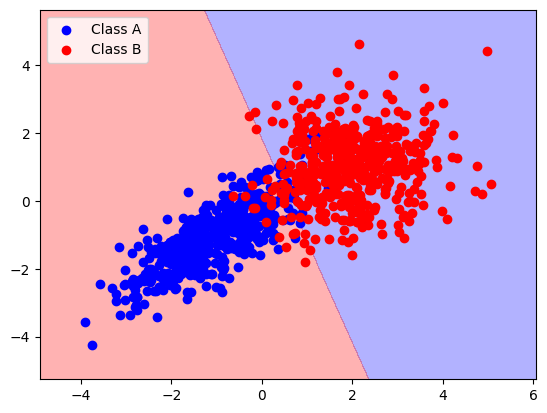

Accuracy on the test set: 93.60%


In [12]:
def logistic_regression(X1_train, X2_train, X1_test, X2_test, learning_rate=0.01, num_iterations=10000):
    X_train, y_train, X_test, y_test = prepare_data(X1_train, X2_train, X1_test, X2_test)
    
    w = np.zeros(X_train.shape[1])
    w, costs = gradient_descent(X_train, y_train, w, learning_rate, num_iterations)

    plot_decision_boundary(X_test, y_test, w)
    
    test_predictions = sigmoid(np.dot(X_test, w)) >= 0.5
    accuracy = np.mean(test_predictions == y_test)
    print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

logistic_regression(X1_train, X2_train, X1_test, X2_test, learning_rate=0.01, num_iterations=10000)
